# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
sns.set_style('whitegrid')
import warnings
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Reading the Files

In [2]:
train=pd.read_csv('C:\\Users\\arpit.kulshrestha\\Downloads\\Av hacka\\train.csv')
test=pd.read_csv('C:\\Users\\arpit.kulshrestha\\Downloads\\Av hacka\\test.csv')

In [3]:
train_shape=train.shape                          #Checking for Train shape
train_shape

(245725, 11)

In [4]:
test_shape=test.shape                          #checking for test shape
test_shape

(105312, 10)

In [5]:
train.dtypes                                #checking for train data types

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [6]:
train['Is_Lead']=train['Is_Lead'].astype('category')             #converting is_lead into category

In [7]:
train.dtypes                                                    #checking train data types after converting is_lead

ID                       object
Gender                   object
Age                       int64
Region_Code              object
Occupation               object
Channel_Code             object
Vintage                   int64
Credit_Product           object
Avg_Account_Balance       int64
Is_Active                object
Is_Lead                category
dtype: object

In [8]:
test.dtypes                                   #checking test data types

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [9]:
train.isna().sum()*100/len(train)           #checking null values in train 

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [10]:
test.isna().sum()*100/len(test)                  #checking null values in test

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [11]:
train.corr()                                  #checking correlation amoung numerical variables

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


In [12]:
train['Is_Lead'].value_counts(normalize=True)         #checking target column classification of classes

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

In [13]:
xtrain=train.drop('Is_Lead',axis=1)               #dropping target variable           
xtrain.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No


In [14]:
data=pd.concat([xtrain,test],axis=0)          #concating train and test data into single dataset
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No


In [15]:
data.shape

(351037, 10)

In [16]:
data[data.duplicated()==True]                   #checking for duplicates

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active


In [17]:
data.dtypes                              #checking for datatypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [18]:
data_cat=data.select_dtypes(include='O')             #separating categorical values
data_cat.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,NNVBBKZB,Female,RG268,Other,X3,No,No
1,IDD62UNG,Female,RG277,Salaried,X1,No,No
2,HD3DSEMC,Female,RG268,Self_Employed,X3,No,Yes
3,BF3NC7KV,Male,RG270,Salaried,X1,No,No
4,TEASRWXV,Female,RG282,Salaried,X1,No,No


In [19]:
data_num=data.select_dtypes(exclude='O')               #separating numerical values
data_num.head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


# Checking Class Distribution

In [508]:
for i in data_cat.columns[1:]:                           #checking distribution of classes in categorical features
    print(i,' ',data_cat[i].nunique(),'\n',data[i].value_counts(normalize=True)*100,'\n')

Gender   2 
 Male      54.667172
Female    45.332828
Name: Gender, dtype: float64 

Region_Code   35 
 RG268    14.545190
RG283    12.049157
RG254    10.989440
RG284     7.831938
RG277     5.247880
RG280     5.214265
RG270     3.179152
RG269     3.176588
RG261     3.110498
RG257     2.475238
RG251     2.457861
RG282     2.326251
RG272     2.162165
RG274     2.134818
RG281     2.061606
RG273     1.794683
RG252     1.736854
RG279     1.588437
RG263     1.510382
RG275     1.318380
RG260     1.256278
RG256     1.151161
RG264     1.149167
RG276     1.124953
RG259     1.050602
RG250     1.009580
RG255     0.828688
RG258     0.787097
RG253     0.760034
RG278     0.753767
RG262     0.737244
RG265     0.630703
RG266     0.629278
RG271     0.625575
RG267     0.595094
Name: Region_Code, dtype: float64 

Occupation   4 
 Self_Employed    41.043537
Salaried         29.316568
Other            28.573626
Entrepreneur      1.066269
Name: Occupation, dtype: float64 

Channel_Code   4 
 X1    42.218342
X

In [20]:
data['Credit_Product'].value_counts(normalize=True)*100

No     66.61438
Yes    33.38562
Name: Credit_Product, dtype: float64

# Null Value Analysis

In [20]:
data['Credit_Product']=data['Credit_Product'].fillna('None')

In [21]:
data.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [302]:
data['Credit_Product'].value_counts(normalize=True)*100

No      58.673302
Yes     29.405732
None    11.920966
Name: Credit_Product, dtype: float64

# EDA

### Univariate Analysis

In [305]:
data.shape

(351037, 10)

In [22]:
data.index.is_unique                    #checking unique indexes

False

In [23]:
data=data.reset_index()
data.drop('index',axis=1,inplace=True)                  #resetting the index values to unique ones
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No


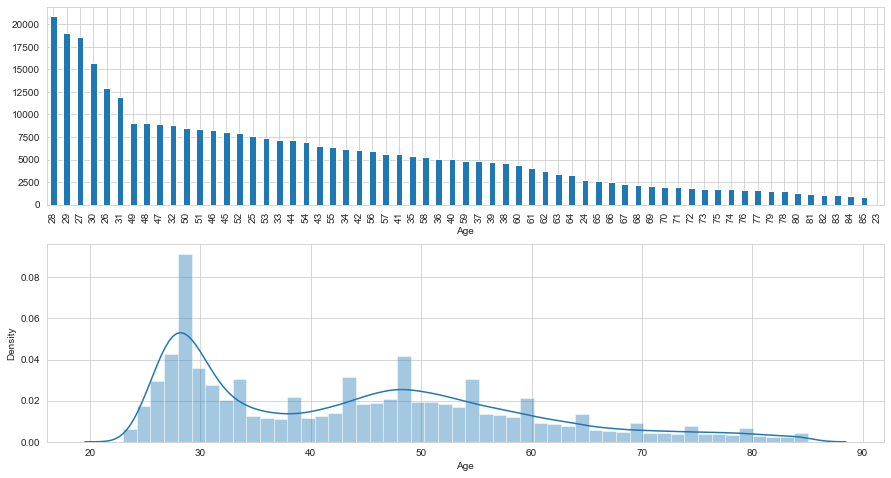

In [308]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
data["Age"].value_counts().plot.bar(figsize=(15,8))
plt.xlabel('Age')
plt.subplot(2,1,2)
sns.distplot(data["Age"])
plt.show()

1. People from age group 28-31 have high frequency in dataset
2. Data is rightly skewed

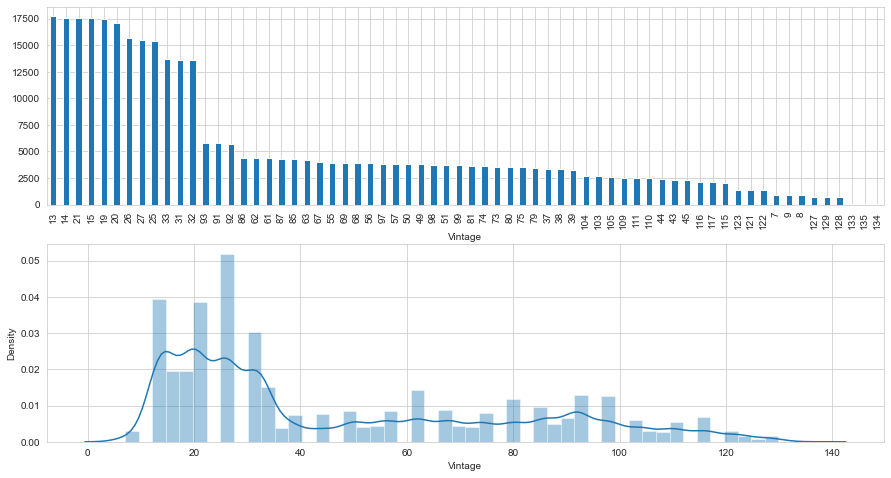

In [310]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
data["Vintage"].value_counts().plot.bar(figsize=(15,8))
plt.xlabel('Vintage')
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.distplot(data["Vintage"])
plt.show()

1. Most of the people are having vintage between 13-33
2. Vintage is rightly skewed

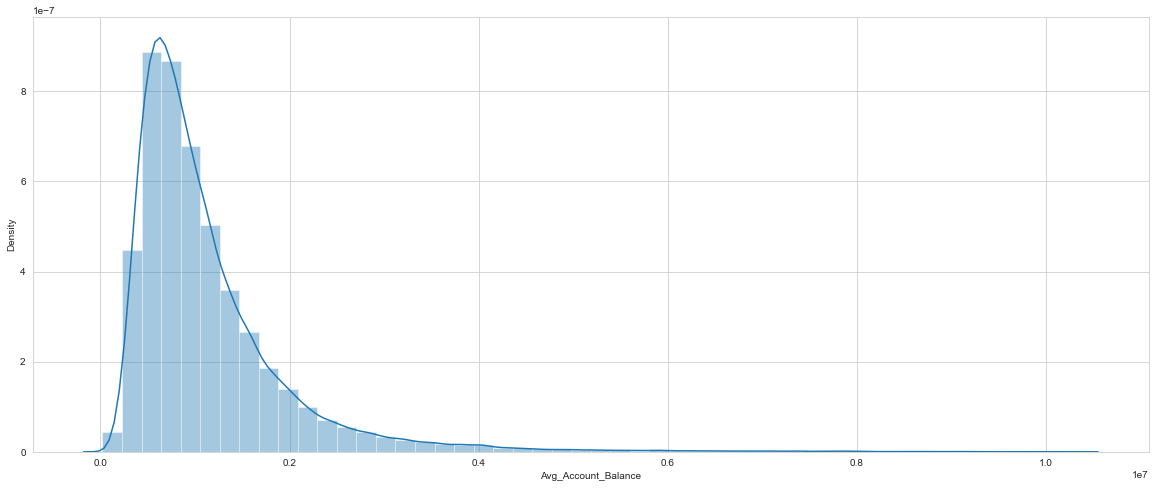

In [312]:
plt.figure(figsize=(20,8))
sns.distplot(data.Avg_Account_Balance)
plt.show()

Data is skewed with people having low avg. account balance

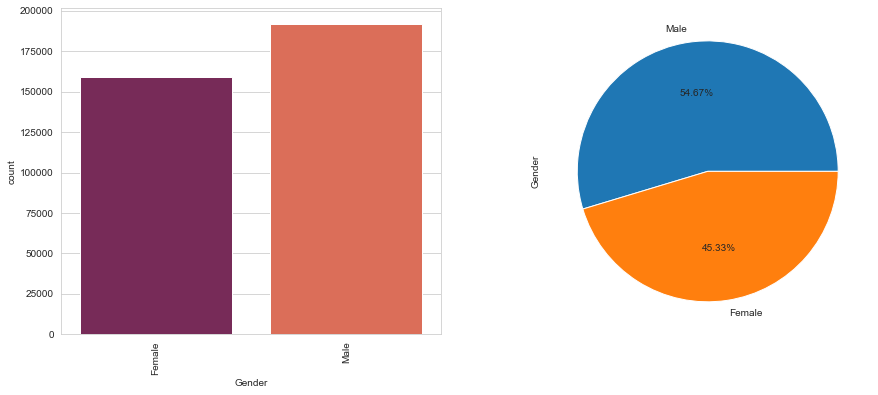

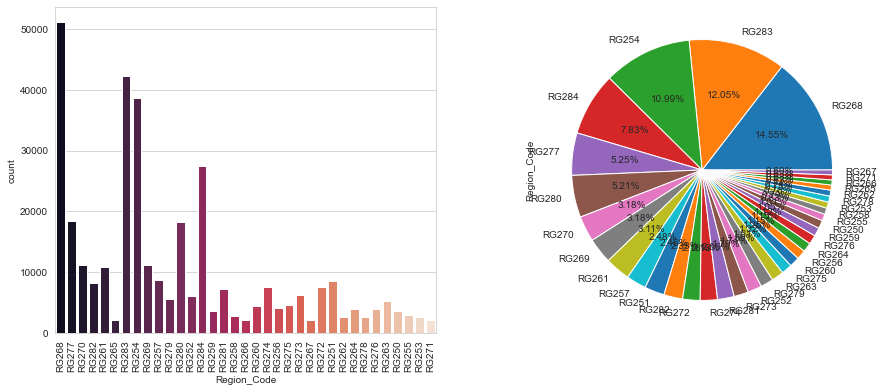

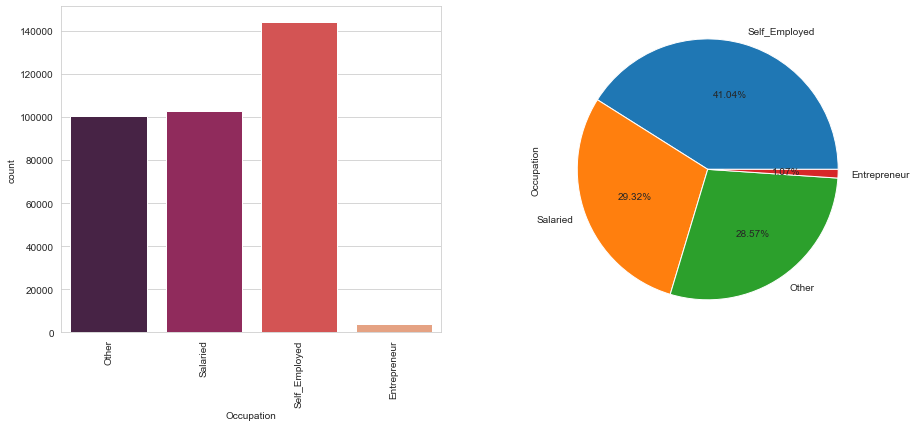

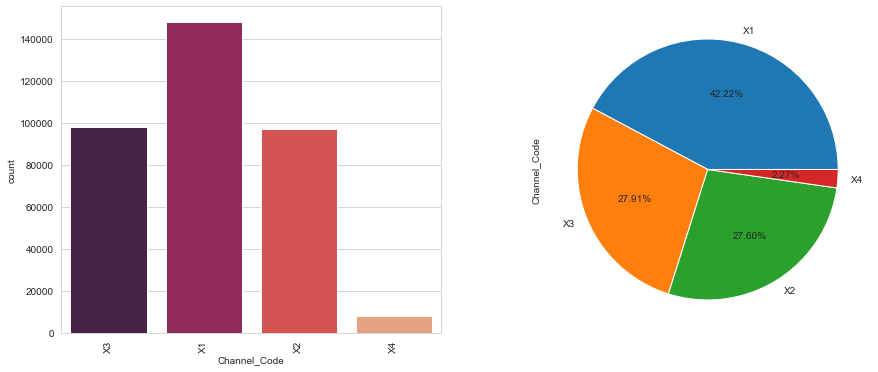

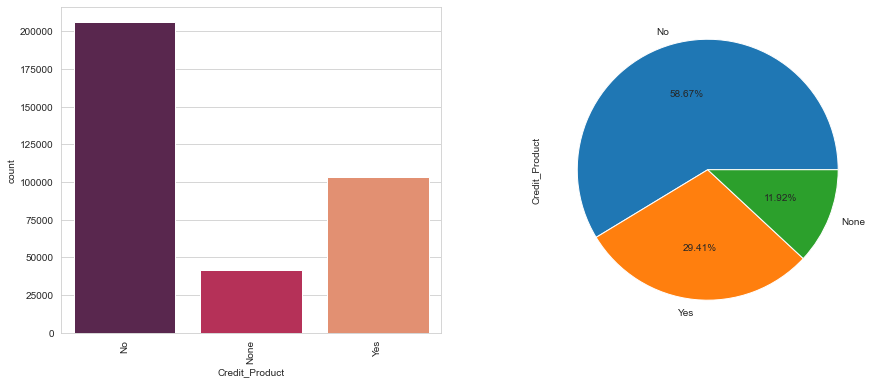

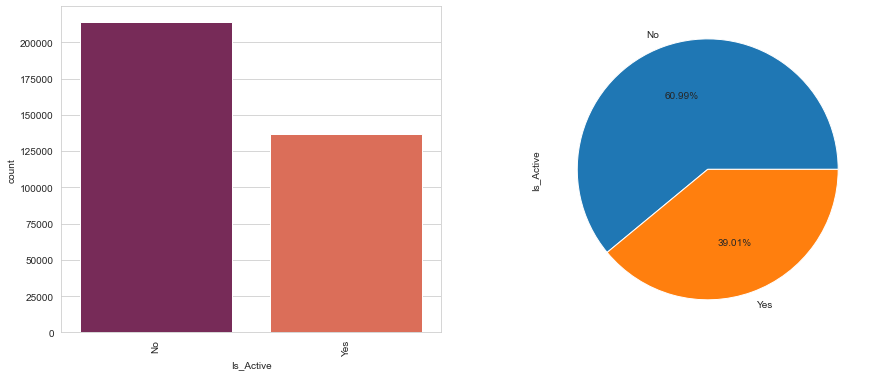

In [314]:
for i in data_cat.columns[1:]:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.countplot(data[i],palette='rocket')
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    data[i].value_counts().plot.pie(autopct="%0.2f%%")
    plt.show()

1. More males are there in data
2. More Self_employed customers are there in dataset ,entreprenuers are mostly not our customers
3. X1 channel code is the most used channel code and X4 is the minimum one
4. Majority of the customers doesnot have any credit_product
5. Majority of customers are not active in last three months

### Bivariate analysis

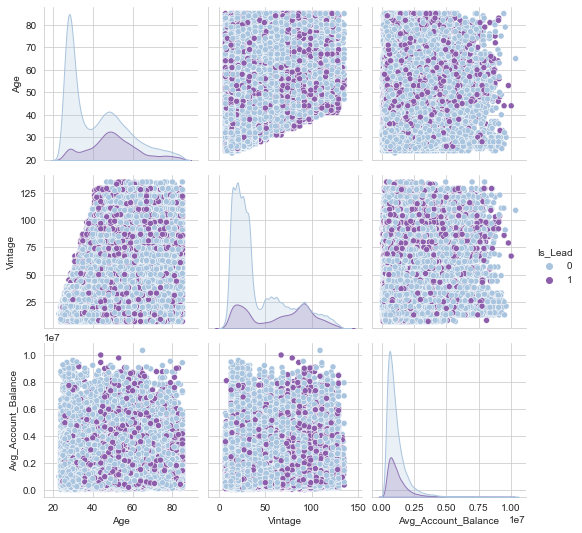

In [317]:
sns.pairplot(data=train,x_vars=data_num, hue = 'Is_Lead', palette='BuPu')
plt.show()

There is no as such linear relationship between them

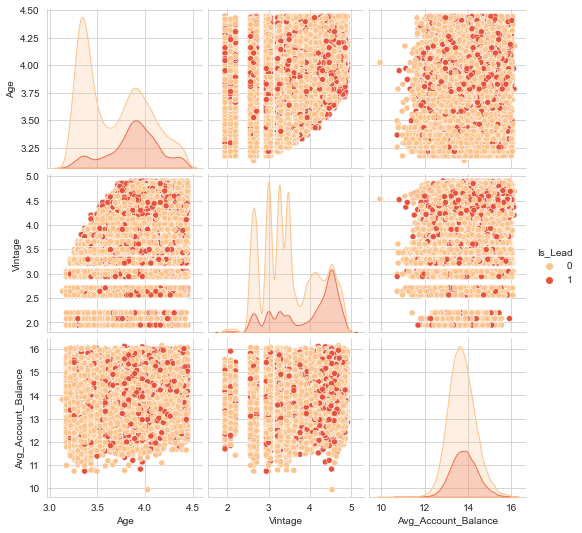

In [319]:
temp1 = train.copy()
temp1[data_num.columns] = np.log(train[data_num.columns])
sns.pairplot(data=temp1,x_vars=data_num, hue = 'Is_Lead', palette='OrRd')
plt.show()

In [320]:
data.corr()

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.628558,0.142563
Vintage,0.628558,1.000000,0.166611
Avg_Account_Balance,0.142563,0.166611,1.000000


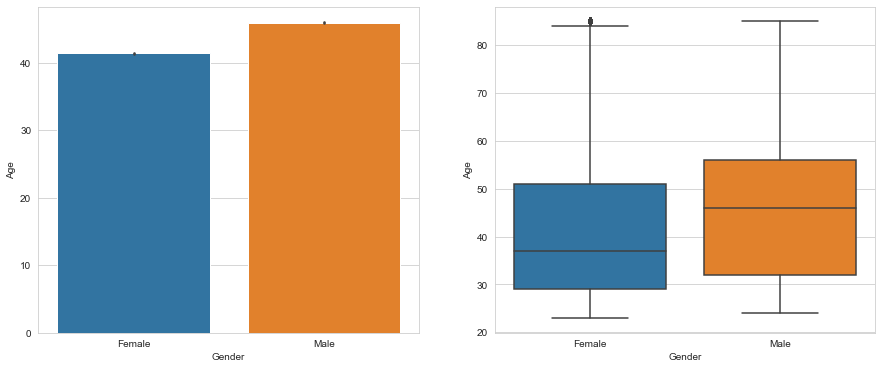

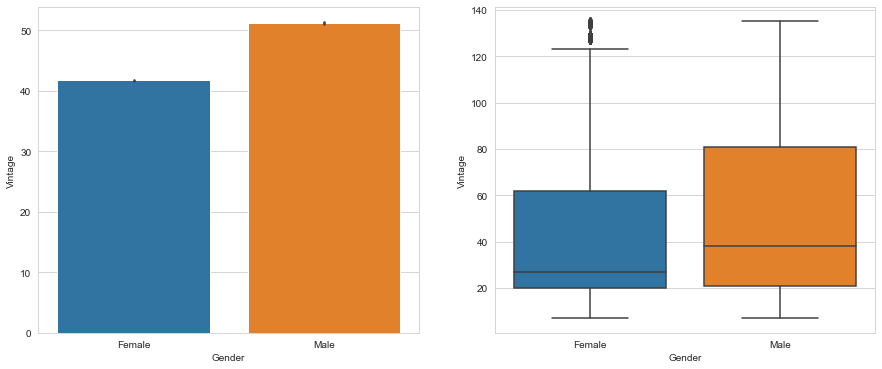

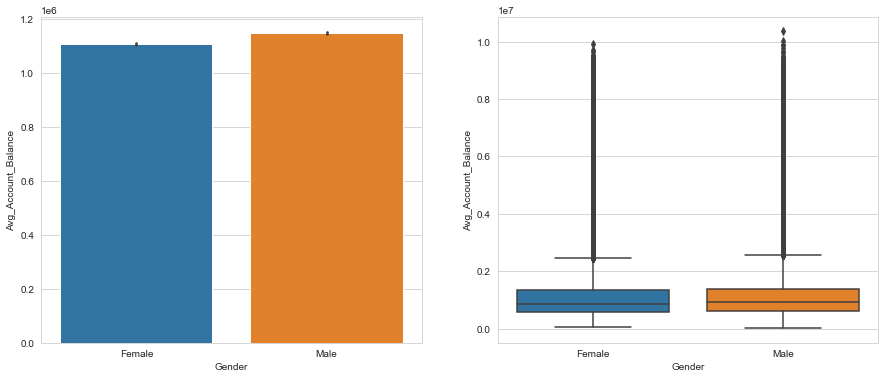

In [321]:
for i in data_num.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.barplot(data['Gender'],data[i])
    plt.subplot(1,2,2)
    sns.boxplot(data['Gender'],data[i])
    plt.show()

1. Avg age of male is 45 around and female is 40 yrs
2. Majority of the age lie around 30 yrs
3. Age vs Gender distribution is Right skewed
4. Vintage for males if avg 50 and for females is avg 40
5. Majority of vintage if 20 months
6. Avg account balance for make and female is almost same,around 1.1M,

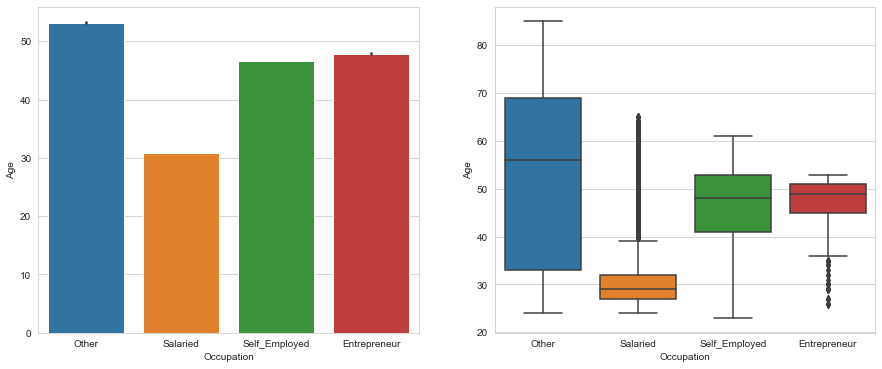

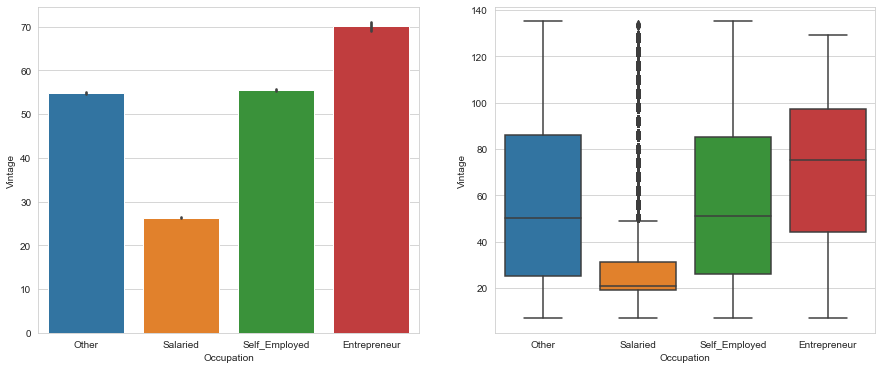

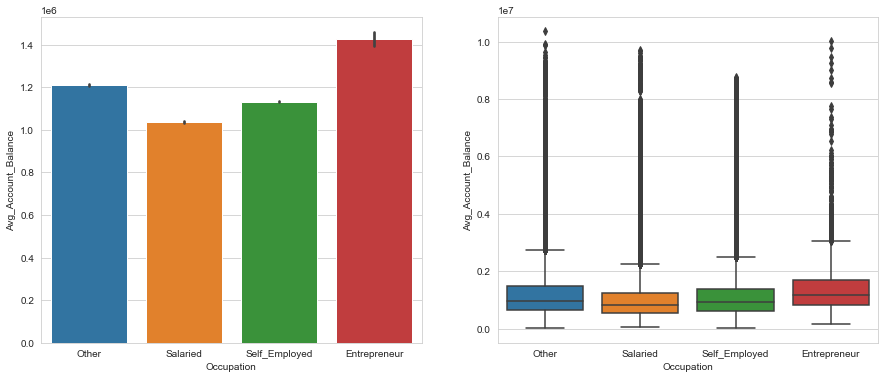

In [325]:
for i in data_num.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.barplot(data['Occupation'],data[i])
    plt.subplot(1,2,2)
    sns.boxplot(data['Occupation'],data[i])
    plt.show()

1. Others have highest avg Age and salaried have lowest avg age
2. Vintage for salaried is lowest and and for entrepreneurs it is highest
3. Salary is highest for Entreprenueurs and lowest for salaried but median is almost same for all classes,
   this shows presence of heavy outliers in data

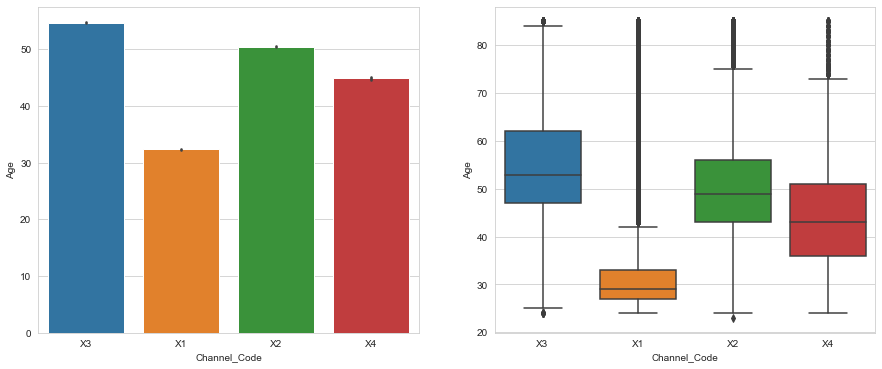

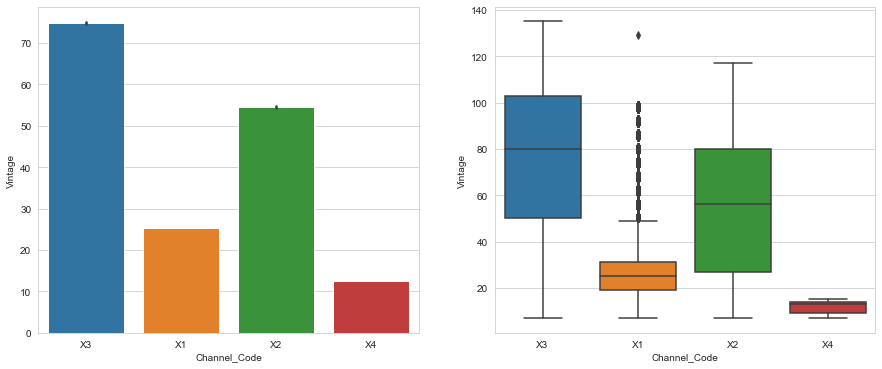

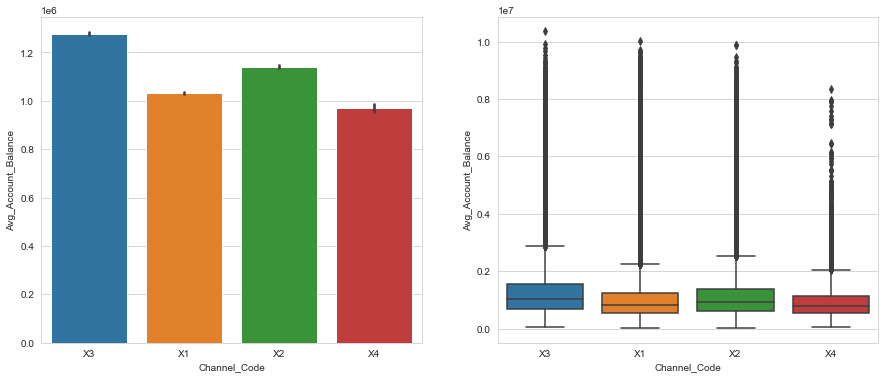

In [327]:
for i in data_num.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.barplot(data['Channel_Code'],data[i])
    plt.subplot(1,2,2)
    sns.boxplot(data['Channel_Code'],data[i])
    plt.show()

1. Mean age of X3 is highest and lowest for X1 and X1 have heavy outliers
2. Avg Vintage is highest for X3 and lowest for X4,X1 have high outliers
3. Avg_account_Balance is highest for X3 and lowest for X4,all channel_code have outliers

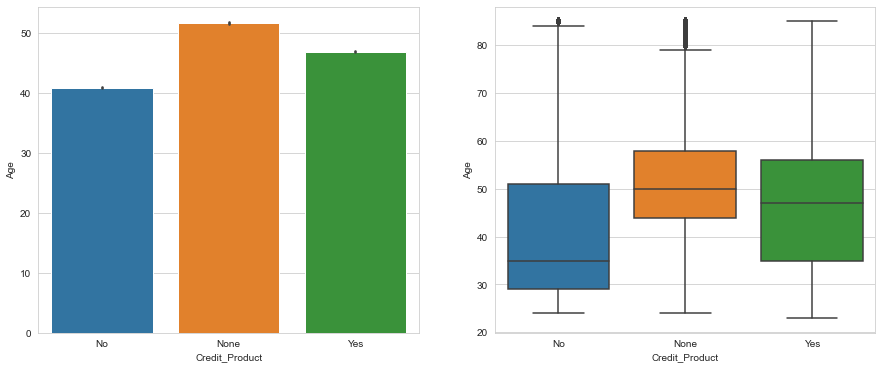

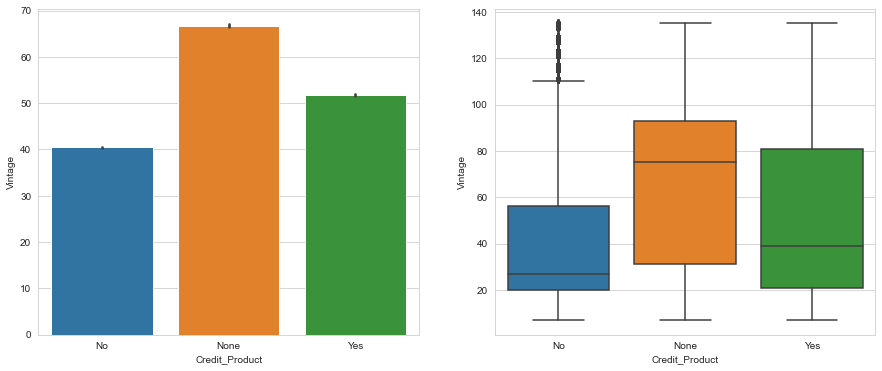

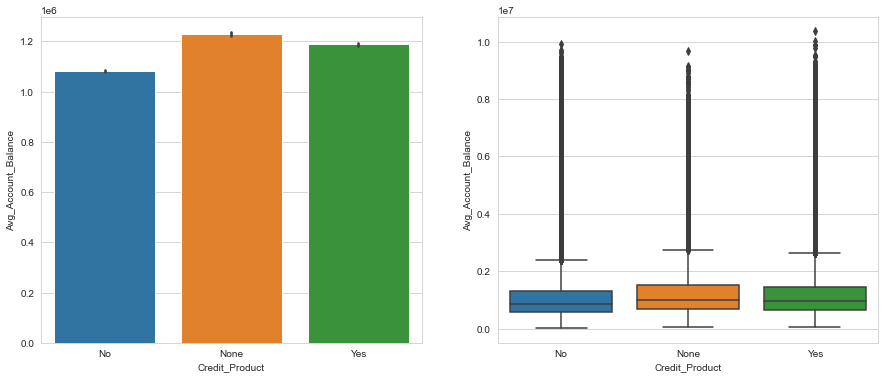

In [329]:
for i in data_num.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.barplot(data['Credit_Product'],data[i])
    plt.subplot(1,2,2)
    sns.boxplot(data['Credit_Product'],data[i])
    plt.show()

1. Mean age for None category have credit_product is high
2. Mean Vintage for None category have credit_product is high
3. Mean avg_account_balance for None category have credit_product is high,all have heavy outliers

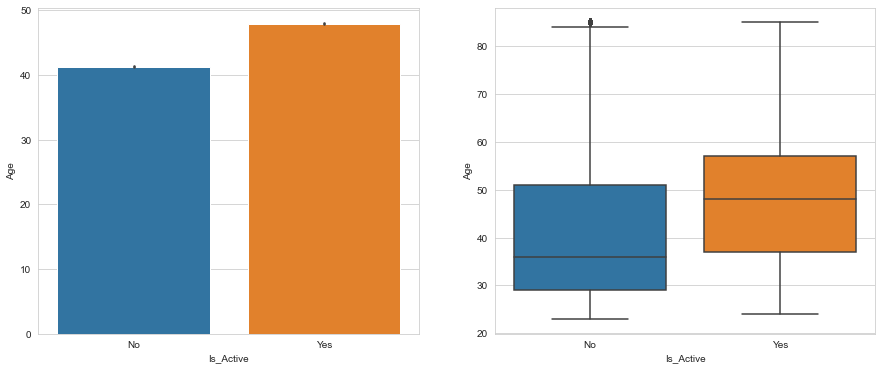

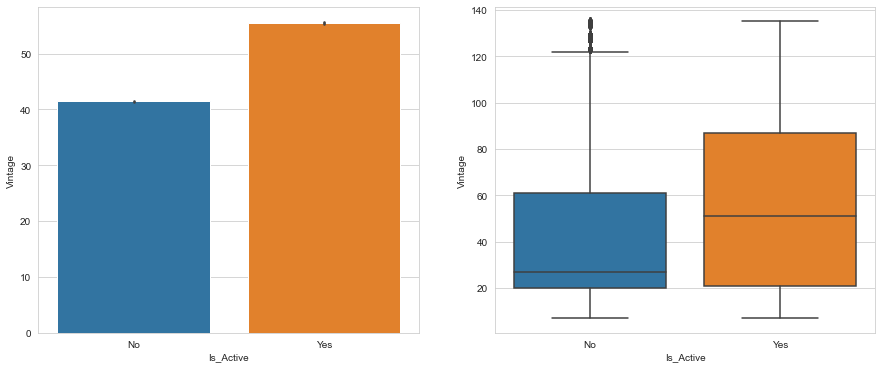

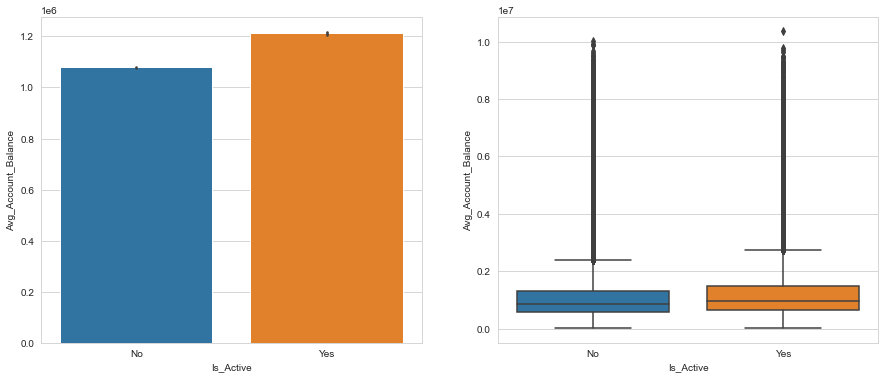

In [331]:
for i in data_num.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.barplot(data['Is_Active'],data[i])
    plt.subplot(1,2,2)
    sns.boxplot(data['Is_Active'],data[i])
    plt.show()

1. Mean age for customers who are active are high
2. Mean vintage for customers who are active are high
3. Mean avg_accnt_balance for customers who are active are high,Outliers are also high

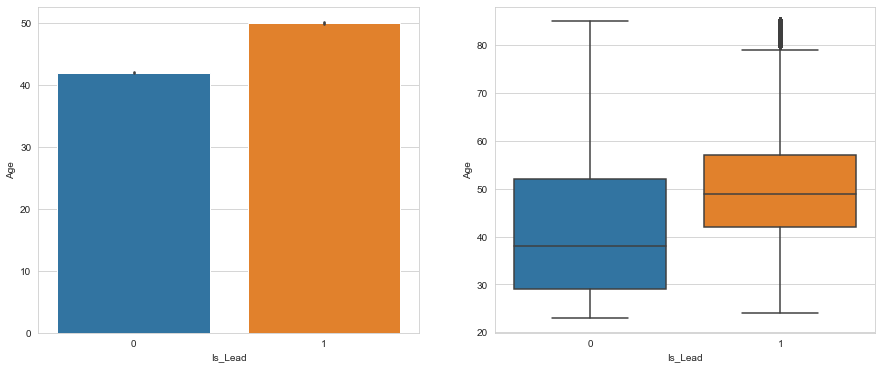

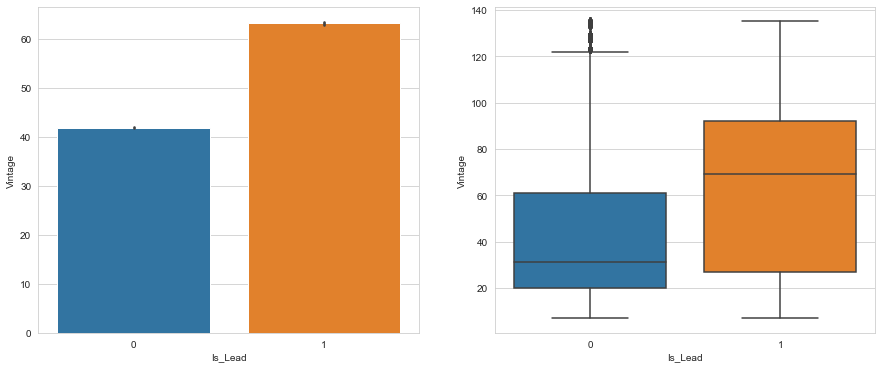

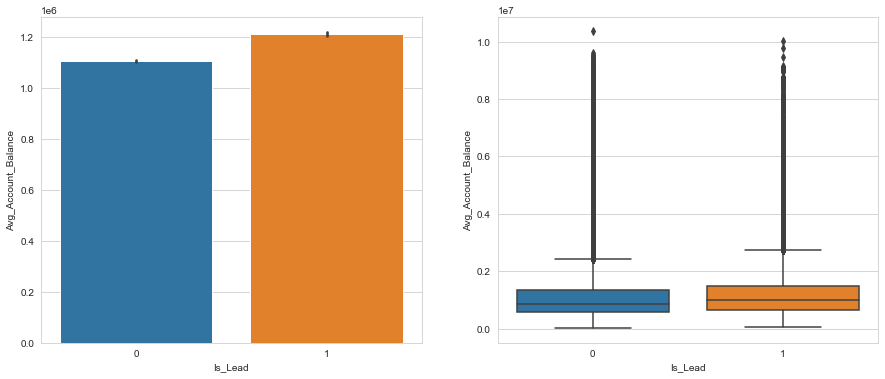

In [333]:
x=train.shape[0]
for i in data_num.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.barplot(train['Is_Lead'],data[i].iloc[:x])
    plt.subplot(1,2,2)
    sns.boxplot(train['Is_Lead'],data[i].iloc[:x])
    plt.show()

1. People who are interested have high avg age
2. People who are interested have high avg vintage
3. People who are interested have high avg avg_account balance

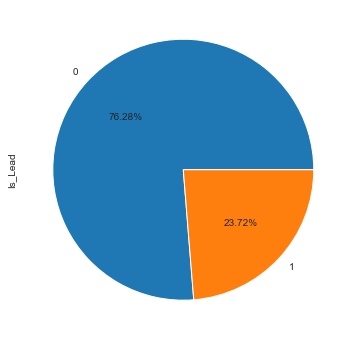

In [335]:
plt.figure(figsize=(10,6))
train['Is_Lead'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

Customer who are not interested are more in this data set,uneven distribution is there in data

<Figure size 1080x432 with 0 Axes>

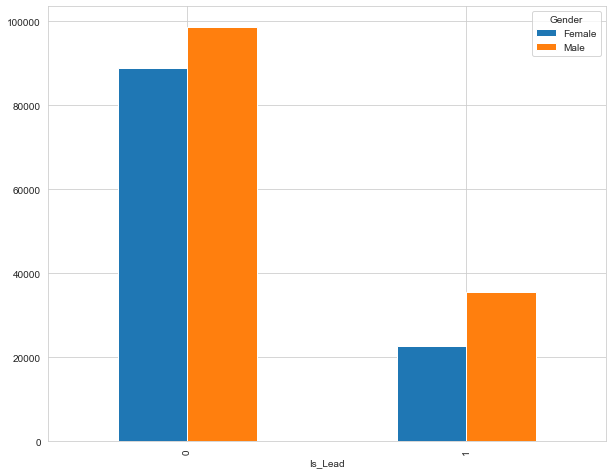

<Figure size 1080x432 with 0 Axes>

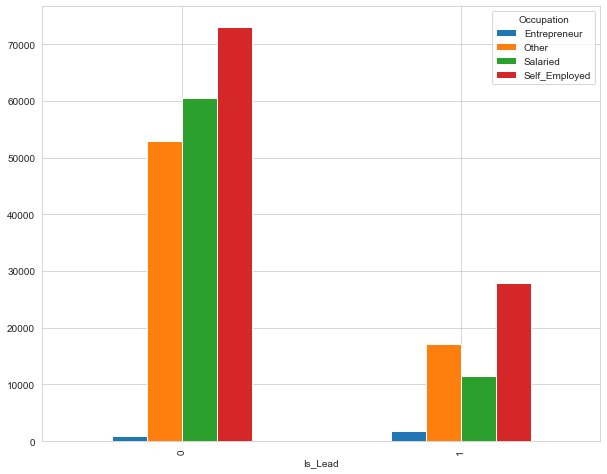

<Figure size 1080x432 with 0 Axes>

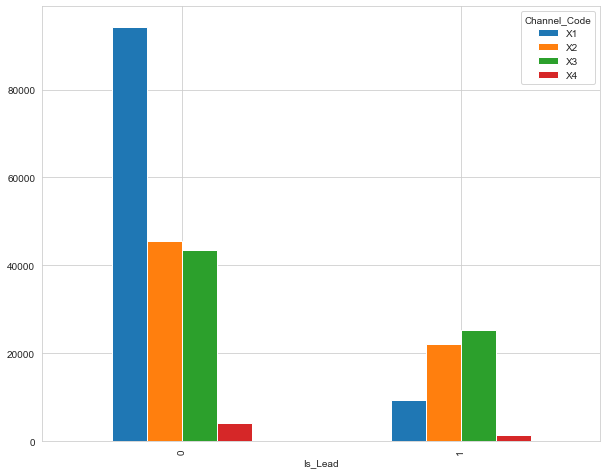

<Figure size 1080x432 with 0 Axes>

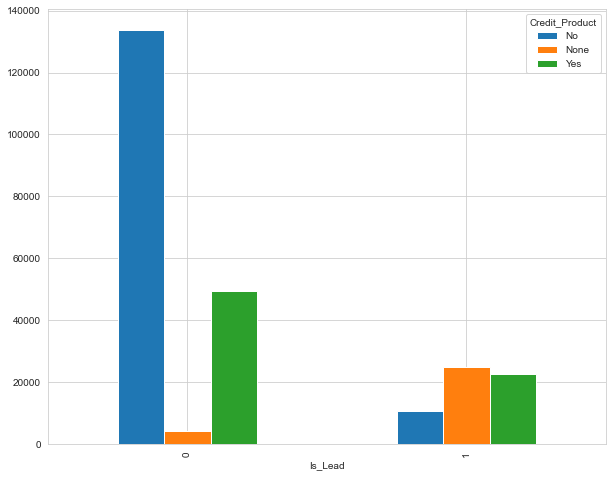

<Figure size 1080x432 with 0 Axes>

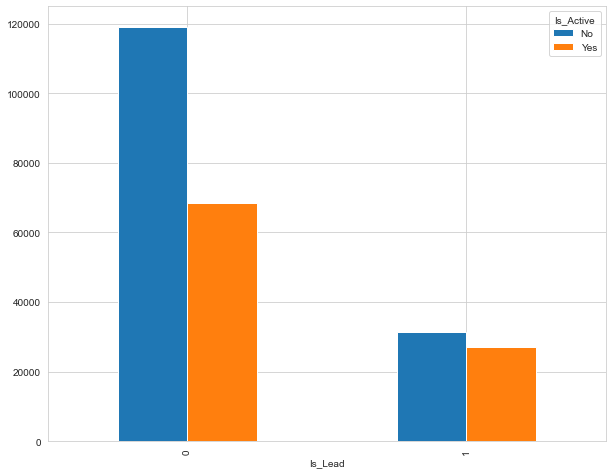

In [337]:
l=['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']
for i in l:
    plt.figure(figsize=(15,6))
    pd.crosstab(train['Is_Lead'],data[i].iloc[:x]).plot.bar(figsize=(10,8))
    plt.show()

1. Male are more for both interested and non-interested customers
2. Self-employed are more for both interested and non-interested customers
3. X1 channel code is more for not-interested customers and X3 for not-Interested Customers
4. For not-interested customers there are more customere with no credit product and for interested customers there are more with credit products
5. Not-Active customers are more for both interested and non-interested customers

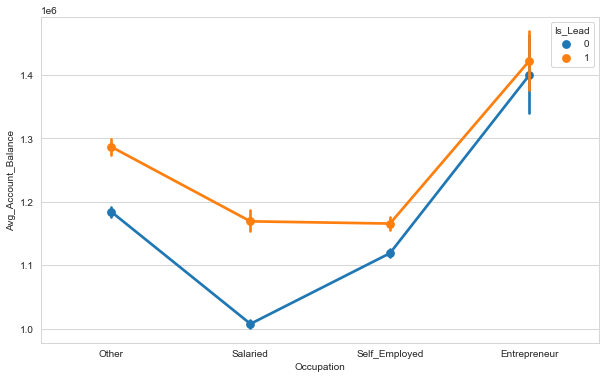

In [339]:
plt.figure(figsize=(10,6))
sns.pointplot(data['Occupation'].iloc[:x],data['Avg_Account_Balance'].iloc[:x],hue=train['Is_Lead'])
plt.show()

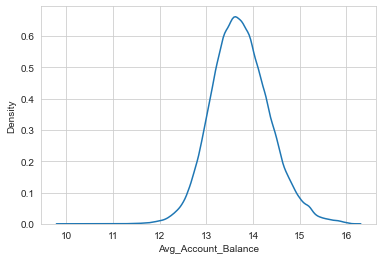

In [518]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])     #Transforming skewed feature
sns.kdeplot(train['Avg_Account_Balance'])
plt.show()

### Splitting of data

In [24]:
x=train.shape[0]                             
xtrain=data.iloc[:x]
ytrain=train['Is_Lead']
xtest=data.iloc[x:]

In [25]:
ytrain.value_counts(normalize=True)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

In [26]:
xtrain.drop('ID',axis=1,inplace=True)                    #Dropping ID from both test and train dataset
xtest.drop('ID',axis=1,inplace=True)

In [27]:
data_cat=xtrain.select_dtypes(include='O')             #separating categorical data
data_cat

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,Female,RG268,Other,X3,No,No
1,Female,RG277,Salaried,X1,No,No
2,Female,RG268,Self_Employed,X3,No,Yes
3,Male,RG270,Salaried,X1,No,No
4,Female,RG282,Salaried,X1,No,No
...,...,...,...,...,...,...
245720,Male,RG284,Self_Employed,X3,None,No
245721,Male,RG268,Salaried,X1,No,Yes
245722,Female,RG281,Salaried,X1,No,No
245723,Female,RG273,Salaried,X1,No,No


### Encoding and Scaling

In [28]:
le=LabelEncoder()                                  
for i in data_cat.columns:
    xtrain[i]=le.fit_transform(xtrain[i])
    xtest[i]=le.fit_transform(xtest[i])

l=[ 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Avg_Account_Balance']

ss=StandardScaler()
for i in l:
    xtrain[i]=ss.fit_transform(xtrain[[i]])
    xtest[i]=ss.transform(xtest[[i]])
    

In [30]:
xtrain.skew()

Gender                -0.185298
Age                    0.618992
Region_Code           -0.265560
Occupation            -0.303374
Channel_Code           0.386726
Vintage                0.790189
Credit_Product         0.610877
Avg_Account_Balance    2.968727
Is_Active              0.458036
dtype: float64

## Building Models

In [ ]:
#Logistic Regression Model

In [347]:
pipe_lr=Pipeline((

('lr',LogisticRegression()),
))
pipe_lr.fit(xtrain,ytrain)
ypred_prob_lr=pipe_lr.predict_proba(xtrain)
roc_lr=roc_auc_score(ytrain,ypred_prob_lr[:,1])
roc_lr

0.8015064451535852

In [362]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,confusion_matrix,accuracy_score
print("accuracy score is : ",accuracy_score(ytrain,pipe_lr.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_lr.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_lr.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_lr.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_lr.predict(xtrain)))

accuracy score is :  0.7733604639332587
Precision is :  0.5342097636799537
Recall is:  0.3478760636837771
F1 Score is :  0.42136214868304844
classification report 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86    187437
           1       0.53      0.35      0.42     58288

    accuracy                           0.77    245725
   macro avg       0.68      0.63      0.64    245725
weighted avg       0.75      0.77      0.76    245725



In [ ]:
# KNN Model

In [348]:
pipe_knn=Pipeline((

('knn',KNeighborsClassifier()),
))
pipe_knn.fit(xtrain,ytrain)
ypred_prob_knn=pipe_knn.predict_proba(xtrain)
roc_knn=roc_auc_score(ytrain,ypred_prob_knn[:,1])
roc_knn

0.9322874321255518

In [363]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_knn.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_knn.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_knn.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_knn.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_knn.predict(xtrain)))

accuracy score is :  0.8777495167361888
Precision is :  0.8049749524961133
Recall is:  0.6395827614603349
F1 Score is :  0.7128107074569789
classification report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92    187437
           1       0.80      0.64      0.71     58288

    accuracy                           0.88    245725
   macro avg       0.85      0.80      0.82    245725
weighted avg       0.87      0.88      0.87    245725



In [ ]:
#Random Forest Model

In [349]:
pipe_rf=Pipeline((

('rf',RandomForestClassifier(n_estimators=500)),
))
pipe_rf.fit(xtrain,ytrain)
ypred_prob_rf=pipe_rf.predict_proba(xtrain)
roc_rf=roc_auc_score(ytrain,ypred_prob_rf[:,1])
roc_rf

0.9999999998169391

In [364]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_rf.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_rf.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_rf.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_rf.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_rf.predict(xtrain)))

accuracy score is :  0.9999918608200223
Precision is :  1.0
Recall is:  0.9999656876200933
F1 Score is :  0.9999828435157068
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    187437
           1       1.00      1.00      1.00     58288

    accuracy                           1.00    245725
   macro avg       1.00      1.00      1.00    245725
weighted avg       1.00      1.00      1.00    245725



In [ ]:
#Decision tree Model

In [350]:
pipe_dt=Pipeline((
('dt',DecisionTreeClassifier(max_depth=10)),
))
pipe_dt.fit(xtrain,ytrain)
ypred_prob_dt=pipe_dt.predict_proba(xtrain)
roc_dt=roc_auc_score(ytrain,ypred_prob_dt[:,1])
roc_dt

0.8797271286665909

In [365]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_dt.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_dt.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_dt.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_dt.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_dt.predict(xtrain)))

accuracy score is :  0.8612595381015362
Precision is :  0.8212426978226235
Recall is:  0.53060664287675
F1 Score is :  0.6446825363738692
classification report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91    187437
           1       0.82      0.53      0.64     58288

    accuracy                           0.86    245725
   macro avg       0.84      0.75      0.78    245725
weighted avg       0.86      0.86      0.85    245725



In [ ]:
#Gradient Boosting Model

In [368]:
pipe_gb=Pipeline((

('gb',GradientBoostingClassifier()),
))
pipe_gb.fit(xtrain,ytrain)
ypred_prob_gb=pipe_gb.predict_proba(xtrain)
roc_gb=roc_auc_score(ytrain,ypred_prob_gb[:,1])
roc_gb

0.8734338380755683

In [369]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_gb.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_gb.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_gb.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_gb.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_gb.predict(xtrain)))

accuracy score is :  0.8603642283039984
Precision is :  0.8052867474788632
Recall is:  0.5425130387043645
F1 Score is :  0.648284062487187
classification report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91    187437
           1       0.81      0.54      0.65     58288

    accuracy                           0.86    245725
   macro avg       0.84      0.75      0.78    245725
weighted avg       0.86      0.86      0.85    245725



In [ ]:
#Ada Boost Model

In [353]:
pipe_ad=Pipeline((
('ad',AdaBoostClassifier()),
))
pipe_ad.fit(xtrain,ytrain)
ypred_prob_ad=pipe_ad.predict_proba(xtrain)
roc_ad=roc_auc_score(ytrain,ypred_prob_ad[:,1])
roc_ad

0.865616713626246

In [370]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_ad.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_ad.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_ad.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_ad.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_ad.predict(xtrain)))

accuracy score is :  0.8555824600671482
Precision is :  0.8165486602804387
Recall is:  0.5045292341476805
F1 Score is :  0.6236917171245877
classification report 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91    187437
           1       0.82      0.50      0.62     58288

    accuracy                           0.86    245725
   macro avg       0.84      0.73      0.77    245725
weighted avg       0.85      0.86      0.84    245725



In [ ]:
#XGB Classifier Model

In [354]:
pipe_xg=Pipeline((
('xg',XGBClassifier()),
))
pipe_xg.fit(xtrain,ytrain)
ypred_prob_xg=pipe_xg.predict_proba(xtrain)
roc_xg=roc_auc_score(ytrain,ypred_prob_xg[:,1])
roc_xg

[16:46:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8909705653962756

In [371]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_xg.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_xg.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_xg.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_xg.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_xg.predict(xtrain)))

accuracy score is :  0.867070912605555
Precision is :  0.8114244044725328
Recall is:  0.5727079330222344
F1 Score is :  0.671480870579716
classification report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    187437
           1       0.81      0.57      0.67     58288

    accuracy                           0.87    245725
   macro avg       0.84      0.77      0.79    245725
weighted avg       0.86      0.87      0.86    245725



In [ ]:
#Cat Boost Model

In [355]:
pipe_cb=Pipeline((
('cb',CatBoostClassifier()),
))
pipe_cb.fit(xtrain,ytrain)
ypred_prob_cb=pipe_cb.predict_proba(xtrain)
roc_cb=roc_auc_score(ytrain,ypred_prob_cb[:,1])
roc_cb

Learning rate set to 0.108058
0:	learn: 0.6109646	total: 57.3ms	remaining: 57.2s
1:	learn: 0.5485145	total: 115ms	remaining: 57.2s
2:	learn: 0.5024727	total: 165ms	remaining: 54.8s
3:	learn: 0.4670931	total: 229ms	remaining: 56.9s
4:	learn: 0.4416222	total: 270ms	remaining: 53.7s
5:	learn: 0.4227750	total: 312ms	remaining: 51.7s
6:	learn: 0.4080740	total: 348ms	remaining: 49.4s
7:	learn: 0.3971584	total: 389ms	remaining: 48.2s
8:	learn: 0.3851564	total: 439ms	remaining: 48.3s
9:	learn: 0.3786294	total: 484ms	remaining: 47.9s
10:	learn: 0.3736693	total: 534ms	remaining: 48s
11:	learn: 0.3690999	total: 587ms	remaining: 48.4s
12:	learn: 0.3658561	total: 644ms	remaining: 48.9s
13:	learn: 0.3634611	total: 696ms	remaining: 49s
14:	learn: 0.3614584	total: 741ms	remaining: 48.6s
15:	learn: 0.3598276	total: 786ms	remaining: 48.4s
16:	learn: 0.3585218	total: 821ms	remaining: 47.5s
17:	learn: 0.3574329	total: 877ms	remaining: 47.8s
18:	learn: 0.3552180	total: 934ms	remaining: 48.2s
19:	learn: 0.3

160:	learn: 0.3408761	total: 8.23s	remaining: 42.9s
161:	learn: 0.3408526	total: 8.28s	remaining: 42.9s
162:	learn: 0.3408212	total: 8.34s	remaining: 42.8s
163:	learn: 0.3407830	total: 8.39s	remaining: 42.8s
164:	learn: 0.3407571	total: 8.45s	remaining: 42.8s
165:	learn: 0.3407278	total: 8.5s	remaining: 42.7s
166:	learn: 0.3407014	total: 8.55s	remaining: 42.6s
167:	learn: 0.3406688	total: 8.6s	remaining: 42.6s
168:	learn: 0.3406410	total: 8.66s	remaining: 42.6s
169:	learn: 0.3406226	total: 8.71s	remaining: 42.5s
170:	learn: 0.3405553	total: 8.76s	remaining: 42.5s
171:	learn: 0.3405399	total: 8.81s	remaining: 42.4s
172:	learn: 0.3405222	total: 8.86s	remaining: 42.4s
173:	learn: 0.3405034	total: 8.91s	remaining: 42.3s
174:	learn: 0.3404810	total: 8.97s	remaining: 42.3s
175:	learn: 0.3404582	total: 9.02s	remaining: 42.2s
176:	learn: 0.3404356	total: 9.07s	remaining: 42.2s
177:	learn: 0.3404155	total: 9.13s	remaining: 42.2s
178:	learn: 0.3403891	total: 9.18s	remaining: 42.1s
179:	learn: 0.

323:	learn: 0.3373287	total: 16.7s	remaining: 34.8s
324:	learn: 0.3373022	total: 16.7s	remaining: 34.8s
325:	learn: 0.3372898	total: 16.8s	remaining: 34.7s
326:	learn: 0.3372704	total: 16.8s	remaining: 34.7s
327:	learn: 0.3372531	total: 16.9s	remaining: 34.6s
328:	learn: 0.3372317	total: 16.9s	remaining: 34.6s
329:	learn: 0.3372058	total: 17s	remaining: 34.5s
330:	learn: 0.3371875	total: 17s	remaining: 34.5s
331:	learn: 0.3371663	total: 17.1s	remaining: 34.4s
332:	learn: 0.3371481	total: 17.2s	remaining: 34.4s
333:	learn: 0.3371347	total: 17.2s	remaining: 34.3s
334:	learn: 0.3371112	total: 17.3s	remaining: 34.3s
335:	learn: 0.3370953	total: 17.3s	remaining: 34.2s
336:	learn: 0.3370806	total: 17.4s	remaining: 34.1s
337:	learn: 0.3370696	total: 17.4s	remaining: 34.1s
338:	learn: 0.3370521	total: 17.5s	remaining: 34s
339:	learn: 0.3370219	total: 17.5s	remaining: 34s
340:	learn: 0.3370028	total: 17.5s	remaining: 33.9s
341:	learn: 0.3369873	total: 17.6s	remaining: 33.8s
342:	learn: 0.336969

485:	learn: 0.3344428	total: 24.3s	remaining: 25.6s
486:	learn: 0.3344316	total: 24.3s	remaining: 25.6s
487:	learn: 0.3344164	total: 24.3s	remaining: 25.5s
488:	learn: 0.3343986	total: 24.4s	remaining: 25.5s
489:	learn: 0.3343846	total: 24.4s	remaining: 25.4s
490:	learn: 0.3343667	total: 24.5s	remaining: 25.4s
491:	learn: 0.3343429	total: 24.5s	remaining: 25.3s
492:	learn: 0.3343225	total: 24.5s	remaining: 25.2s
493:	learn: 0.3343083	total: 24.6s	remaining: 25.2s
494:	learn: 0.3342913	total: 24.6s	remaining: 25.1s
495:	learn: 0.3342807	total: 24.7s	remaining: 25.1s
496:	learn: 0.3342570	total: 24.7s	remaining: 25s
497:	learn: 0.3342379	total: 24.7s	remaining: 24.9s
498:	learn: 0.3342182	total: 24.8s	remaining: 24.9s
499:	learn: 0.3342044	total: 24.8s	remaining: 24.8s
500:	learn: 0.3341914	total: 24.9s	remaining: 24.8s
501:	learn: 0.3341763	total: 24.9s	remaining: 24.7s
502:	learn: 0.3341539	total: 25s	remaining: 24.7s
503:	learn: 0.3341369	total: 25s	remaining: 24.6s
504:	learn: 0.3341

647:	learn: 0.3318287	total: 31.2s	remaining: 16.9s
648:	learn: 0.3318152	total: 31.2s	remaining: 16.9s
649:	learn: 0.3318006	total: 31.2s	remaining: 16.8s
650:	learn: 0.3317850	total: 31.3s	remaining: 16.8s
651:	learn: 0.3317710	total: 31.3s	remaining: 16.7s
652:	learn: 0.3317596	total: 31.4s	remaining: 16.7s
653:	learn: 0.3317390	total: 31.4s	remaining: 16.6s
654:	learn: 0.3317246	total: 31.5s	remaining: 16.6s
655:	learn: 0.3317064	total: 31.5s	remaining: 16.5s
656:	learn: 0.3316928	total: 31.6s	remaining: 16.5s
657:	learn: 0.3316812	total: 31.6s	remaining: 16.4s
658:	learn: 0.3316684	total: 31.6s	remaining: 16.4s
659:	learn: 0.3316581	total: 31.7s	remaining: 16.3s
660:	learn: 0.3316449	total: 31.7s	remaining: 16.3s
661:	learn: 0.3316321	total: 31.7s	remaining: 16.2s
662:	learn: 0.3316203	total: 31.8s	remaining: 16.2s
663:	learn: 0.3316084	total: 31.8s	remaining: 16.1s
664:	learn: 0.3315876	total: 31.9s	remaining: 16.1s
665:	learn: 0.3315671	total: 31.9s	remaining: 16s
666:	learn: 0.

806:	learn: 0.3295294	total: 37.9s	remaining: 9.07s
807:	learn: 0.3295167	total: 38s	remaining: 9.02s
808:	learn: 0.3295069	total: 38s	remaining: 8.97s
809:	learn: 0.3294927	total: 38s	remaining: 8.92s
810:	learn: 0.3294810	total: 38.1s	remaining: 8.88s
811:	learn: 0.3294707	total: 38.1s	remaining: 8.83s
812:	learn: 0.3294609	total: 38.2s	remaining: 8.78s
813:	learn: 0.3294463	total: 38.2s	remaining: 8.73s
814:	learn: 0.3294323	total: 38.2s	remaining: 8.68s
815:	learn: 0.3294232	total: 38.3s	remaining: 8.63s
816:	learn: 0.3294113	total: 38.3s	remaining: 8.59s
817:	learn: 0.3293923	total: 38.4s	remaining: 8.54s
818:	learn: 0.3293819	total: 38.4s	remaining: 8.5s
819:	learn: 0.3293672	total: 38.5s	remaining: 8.45s
820:	learn: 0.3293476	total: 38.6s	remaining: 8.4s
821:	learn: 0.3293370	total: 38.6s	remaining: 8.36s
822:	learn: 0.3293231	total: 38.6s	remaining: 8.31s
823:	learn: 0.3293073	total: 38.7s	remaining: 8.26s
824:	learn: 0.3292890	total: 38.7s	remaining: 8.22s
825:	learn: 0.329277

967:	learn: 0.3272257	total: 44.5s	remaining: 1.47s
968:	learn: 0.3272115	total: 44.6s	remaining: 1.43s
969:	learn: 0.3271966	total: 44.6s	remaining: 1.38s
970:	learn: 0.3271877	total: 44.7s	remaining: 1.33s
971:	learn: 0.3271717	total: 44.7s	remaining: 1.29s
972:	learn: 0.3271554	total: 44.8s	remaining: 1.24s
973:	learn: 0.3271429	total: 44.8s	remaining: 1.2s
974:	learn: 0.3271311	total: 44.8s	remaining: 1.15s
975:	learn: 0.3271174	total: 44.9s	remaining: 1.1s
976:	learn: 0.3271084	total: 44.9s	remaining: 1.06s
977:	learn: 0.3270918	total: 45s	remaining: 1.01s
978:	learn: 0.3270770	total: 45s	remaining: 965ms
979:	learn: 0.3270671	total: 45s	remaining: 919ms
980:	learn: 0.3270571	total: 45.1s	remaining: 873ms
981:	learn: 0.3270439	total: 45.1s	remaining: 827ms
982:	learn: 0.3270322	total: 45.2s	remaining: 781ms
983:	learn: 0.3270206	total: 45.2s	remaining: 735ms
984:	learn: 0.3270097	total: 45.2s	remaining: 689ms
985:	learn: 0.3269949	total: 45.3s	remaining: 643ms
986:	learn: 0.326976

0.8904458394040162

In [367]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_cb.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_cb.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_cb.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_cb.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_cb.predict(xtrain)))

accuracy score is :  0.8688696713806084
Precision is :  0.8139574099055695
Recall is:  0.5796905023332418
F1 Score is :  0.6771342685370743
classification report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    187437
           1       0.81      0.58      0.68     58288

    accuracy                           0.87    245725
   macro avg       0.85      0.77      0.80    245725
weighted avg       0.86      0.87      0.86    245725



In [ ]:
#LGBM Classifier Model

In [356]:
from lightgbm import LGBMClassifier
pipe_lg=Pipeline((
('lg',LGBMClassifier()),
))
pipe_lg.fit(xtrain,ytrain)
ypred_prob_lg=pipe_lg.predict_proba(xtrain)
roc_lg=roc_auc_score(ytrain,ypred_prob_lg[:,1])
roc_lg

0.8807738648516032

In [372]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_lg.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_lg.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_lg.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_lg.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_lg.predict(xtrain)))

accuracy score is :  0.8626513378777089
Precision is :  0.8087939192590355
Recall is:  0.5513141641504254
F1 Score is :  0.6556825137726994
classification report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91    187437
           1       0.81      0.55      0.66     58288

    accuracy                           0.86    245725
   macro avg       0.84      0.76      0.78    245725
weighted avg       0.86      0.86      0.85    245725



### Doing Cross-Validation For Selecting Model 

In [410]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cross_dt=cross_val_score(estimator=DecisionTreeClassifier(),X=xtrain,y=ytrain,scoring='roc_auc',cv=kfold,n_jobs=-1)

print(cross_dt)
print('mean value',cross_dt.mean())
print('std value',cross_dt.std())

[0.70807043 0.71203148 0.69797942 0.70926049 0.71443683 0.70779901
 0.70553377 0.69560875 0.71120097 0.70712666]
mean value 0.7069047805615862
std value 0.005642438501230211


In [411]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cross_knn=cross_val_score(estimator=KNeighborsClassifier(),X=xtrain,y=ytrain,scoring='roc_auc',cv=kfold,n_jobs=-1)

print(cross_knn)
print('mean value',cross_knn.mean())
print('std value',cross_knn.std())

[0.82086211 0.82194628 0.81562356 0.82294519 0.8267411  0.82322696
 0.82065097 0.81697242 0.82308362 0.82353209]
mean value 0.8215584296400038
std value 0.003090333565354469


In [357]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cross_cat=cross_val_score(estimator=CatBoostClassifier(),X=xtrain,y=ytrain,scoring='roc_auc',cv=kfold,n_jobs=-1)

print(cross_cat)
print('mean value',cross_cat.mean())
print('std value',cross_cat.std())

[0.87161257 0.87064794 0.87233524 0.87301668 0.87779227 0.8733107
 0.87136528 0.86939918 0.87530436 0.87045216]
mean value 0.8725236372248737
std value 0.0023692261998626485


In [373]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cross_rf=cross_val_score(estimator=RandomForestClassifier(),X=xtrain,y=ytrain,scoring='roc_auc',cv=kfold,n_jobs=-1)

print(cross_rf)
print('mean value',cross_rf.mean())
print('std value',cross_rf.std())

[0.85088285 0.85426054 0.8524993  0.85696953 0.8616458  0.85655853
 0.85622323 0.84898767 0.85966985 0.85333624]
mean value 0.8551033542600418
std value 0.003692411792205084


In [375]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cross_xg=cross_val_score(estimator=XGBClassifier(),X=xtrain,y=ytrain,scoring='roc_auc',cv=kfold,n_jobs=-1)

print(cross_xg)
print('mean value',cross_xg.mean())
print('std value',cross_xg.std())

[0.86980774 0.86957013 0.87196072 0.87300027 0.87825836 0.87450587
 0.87168105 0.86920557 0.87438784 0.87006949]
mean value 0.8722447047239754
std value 0.002718441440293976


In [412]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cross_lg=cross_val_score(estimator=LGBMClassifier(),X=xtrain,y=ytrain,scoring='roc_auc',cv=kfold,n_jobs=-1)

print(cross_lg)
print('mean value',cross_lg.mean())
print('std value',cross_lg.std())

[0.87243338 0.87220121 0.87430159 0.87453683 0.87945115 0.87481415
 0.87297029 0.87159039 0.87606949 0.87195391]
mean value 0.8740322381661219
std value 0.0022753559618203566


In [ ]:
#Final CV Table

In [414]:
l=['CatBoostClassifier','RandomForestClassifier','XGBClassifier','LGBMClassifier','KNeighborsClassifier','DecisionTreeClassifier']
mean=[cross_cat.mean(),cross_rf.mean(),cross_xg.mean(),cross_lg.mean(),cross_knn.mean(),cross_dt.mean()]
std=[cross_cat.std(),cross_rf.std(),cross_xg.std(),cross_lg.std(),cross_knn.std(),cross_dt.std()]
cv_table=pd.DataFrame({"Models":l,'Mean ROC AUC score':mean,'Std. Dev.':std})
cv_table.sort_values(by='Mean ROC AUC score',ascending=False)

,Models,Mean ROC AUC score,Std. Dev.
3,LGBMClassifier,0.874032,0.002275
0,CatBoostClassifier,0.872524,0.002369
2,XGBClassifier,0.872245,0.002718
1,RandomForestClassifier,0.855103,0.003692
4,KNeighborsClassifier,0.821558,0.003090
5,DecisionTreeClassifier,0.706905,0.005642


In [ ]:
#Re-Builiding Models after Cross Validation

In [ ]:
#LGBM

In [440]:
pipe_lg1=Pipeline((
('lg',LGBMClassifier(metric = 'auc', n_jobs=-1,random_state=42,objective='binary',reg_lambda = 1,reg_alpha= 1,
    n_estimators=600,min_child_weight=1,max_depth=5,learning_rate= 0.02, num_leaves=30)),
))
pipe_lg1.fit(xtrain,ytrain)
ypred_prob_lg1=pipe_lg1.predict_proba(xtrain)
roc_lg1=roc_auc_score(ytrain,ypred_prob_lg1[:,1])
roc_lg1

0.8789543283340713

In [441]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_lg1.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_lg1.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_lg1.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_lg1.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_lg1.predict(xtrain)))

accuracy score is :  0.8619676467595889
Precision is :  0.8080598675228801
Recall is:  0.5483461432884985
F1 Score is :  0.6533390568467529
classification report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91    187437
           1       0.81      0.55      0.65     58288

    accuracy                           0.86    245725
   macro avg       0.84      0.75      0.78    245725
weighted avg       0.86      0.86      0.85    245725



### LGBM with K-Fold Split

In [437]:
#0.8729
kf=KFold(n_splits=10,shuffle=True)

preds   = list()
y_pred  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(xtrain)):    
    
    X_train, y_train = xtrain.iloc[train_idx,:], ytrain.iloc[train_idx]    
    X_val, y_val = xtrain.iloc[val_idx, :], ytrain.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))

    lg = LGBMClassifier(metric = 'auc', 
                       n_jobs=-1,
                        random_state=42,
                        objective='binary',
                        reg_lambda = 1,
                        reg_alpha= 1,
                        n_estimators=600,
                        min_child_weight=1,
                        max_depth=5,
                        learning_rate= 0.02, 
                        num_leaves=30
                      )
    
    lg.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_val, y_val)] ,early_stopping_rounds=100 ,verbose=100)

    roc_auc = roc_auc_score(y_val,lg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds.append(lg.predict_proba(xtest[xtest.columns])[:, 1])
    
y_pred_final = np.mean(preds,axis=0)    



Fold: 1

[100]	training's auc: 0.87101	valid_1's auc: 0.872103
[200]	training's auc: 0.874424	valid_1's auc: 0.873701
[300]	training's auc: 0.876565	valid_1's auc: 0.875174
[400]	training's auc: 0.877583	valid_1's auc: 0.875586
[500]	training's auc: 0.878463	valid_1's auc: 0.875578

Fold: 2

[100]	training's auc: 0.870397	valid_1's auc: 0.871769
[200]	training's auc: 0.874526	valid_1's auc: 0.874379
[300]	training's auc: 0.876399	valid_1's auc: 0.875764
[400]	training's auc: 0.877367	valid_1's auc: 0.876087
[500]	training's auc: 0.878174	valid_1's auc: 0.876204
[600]	training's auc: 0.879028	valid_1's auc: 0.876053

Fold: 3

[100]	training's auc: 0.87127	valid_1's auc: 0.86669
[200]	training's auc: 0.875001	valid_1's auc: 0.869146
[300]	training's auc: 0.876991	valid_1's auc: 0.86973
[400]	training's auc: 0.878051	valid_1's auc: 0.869584

Fold: 4

[100]	training's auc: 0.871879	valid_1's auc: 0.862841
[200]	training's auc: 0.875204	valid_1's auc: 0.865326
[300]	training's auc: 0.87734

In [439]:
pd.DataFrame(y_pred_final).to_csv('light_new.csv')

In [ ]:
#XGB Model

In [427]:
pipe_xg1=Pipeline((
('xg',XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=1, gamma=0,
    gpu_id=-1,importance_type='gain', interaction_constraints='',learning_rate=0.300000012, max_delta_step=0, max_depth=6,
    min_child_weight=1, monotone_constraints='()',n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,tree_method='exact', use_label_encoder=False,
    validate_parameters=1, verbosity=None)),
))
pipe_xg1.fit(xtrain,ytrain)
ypred_prob_xg1=pipe_xg1.predict_proba(xtrain)
roc_xg1=roc_auc_score(ytrain,ypred_prob_xg1[:,1])
roc_xg1

[11:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8909705653962756

In [426]:
print("accuracy score is : ",accuracy_score(ytrain,pipe_xg1.predict(xtrain)))
print("Precision is : " ,precision_score(ytrain,pipe_xg1.predict(xtrain)))
print("Recall is: " ,recall_score(ytrain,pipe_xg1.predict(xtrain)))
print("F1 Score is : " ,f1_score(ytrain,pipe_xg1.predict(xtrain)))
print("classification report \n",classification_report(ytrain,pipe_xg1.predict(xtrain)))

accuracy score is :  0.867070912605555
Precision is :  0.8114244044725328
Recall is:  0.5727079330222344
F1 Score is :  0.671480870579716
classification report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    187437
           1       0.81      0.57      0.67     58288

    accuracy                           0.87    245725
   macro avg       0.84      0.77      0.79    245725
weighted avg       0.86      0.87      0.86    245725



### XGB Model with K-Fold Split

In [428]:
##0.8733

kf=KFold(n_splits=10,shuffle=True)

preds   = list()
y_pred  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(xtrain)):    
    
    X_train, y_train = xtrain.iloc[train_idx,:], ytrain.iloc[train_idx]    
    X_val, y_val = xtrain.iloc[val_idx, :], ytrain.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))

    xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None
                      )
    
    xg.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_val, y_val)] ,early_stopping_rounds=100 ,verbose=100)

    roc_auc = roc_auc_score(y_val,xg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds.append(xg.predict_proba(xtest[xtest.columns])[:, 1])
    
y_pred_final = np.mean(preds,axis=0)    



Fold: 1

[11:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.54661	validation_1-logloss:0.54705
[99]	validation_0-logloss:0.32573	validation_1-logloss:0.34646

Fold: 2

[11:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.54656	validation_1-logloss:0.54633
[99]	validation_0-logloss:0.32605	validation_1-logloss:0.34611

Fold: 3

[11:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095

In [429]:
pd.DataFrame(y_pred_final).to_csv('xgb_new.csv')

### Oversampling 

In [433]:
sm=SMOTE(random_state=5,n_jobs=-1)
xres,yres=sm.fit_resample(xtrain,ytrain)

In [436]:
kf=KFold(n_splits=10,shuffle=True)

preds   = list()
y_pred  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(xres)):    
    
    X_train, y_train = xres.iloc[train_idx,:], yres.iloc[train_idx]    
    X_val, y_val = xres.iloc[val_idx, :], yres.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))

    xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None
                      )
    
    xg.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_val, y_val)] ,early_stopping_rounds=100 ,verbose=100)
    roc_auc = roc_auc_score(y_val,lg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds.append(lg.predict_proba(xtest[xtest.columns])[:, 1])
    
y_pred_final_lg3 = np.mean(preds,axis=0)    


Fold: 1

[12:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.58098	validation_1-logloss:0.58132
[99]	validation_0-logloss:0.24114	validation_1-logloss:0.24989

Fold: 2

[12:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.58130	validation_1-logloss:0.58074
[99]	validation_0-logloss:0.24043	validation_1-logloss:0.24571

Fold: 3

[12:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095

### Checking Multicollinearity

In [442]:
vif=pd.DataFrame()
vif['Features']=xtrain.columns
vif['vif']=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif.sort_values(by='vif',ascending=False)

,Features,vif
1,Age,2.155325
4,Channel_Code,1.818691
5,Vintage,1.811296
0,Gender,1.586744
8,Is_Active,1.383580
6,Credit_Product,1.378387
3,Occupation,1.099562
7,Avg_Account_Balance,1.038072
2,Region_Code,1.023949


There is NO multicollinearity as value of VIF is less than 5

### Final Model

In [524]:
#Stacking Classifier

In [31]:
from lightgbm import LGBMClassifier
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
lg = LGBMClassifier(metric = 'auc', 
                       n_jobs=-1,
                        random_state=42,
                        objective='binary',
                        reg_lambda = 1,
                        reg_alpha= 1,
                        n_estimators=600,
                        min_child_weight=1,
                        max_depth=5,
                        learning_rate= 0.02, 
                        num_leaves=30
                      )

In [40]:

from sklearn.ensemble import StackingClassifier
kf=KFold(n_splits=10,shuffle=True)

preds   = list()
y_pred  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(xtrain)):    
    
    X_train, y_train = xtrain.iloc[train_idx,:], ytrain.iloc[train_idx]    
    X_val, y_val = xtrain.iloc[val_idx, :], ytrain.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))

    sc =StackingClassifier([('lg',lg),('xg',xg)], xg )
    
    sc.fit(X_train, y_train)

    roc_auc = roc_auc_score(y_val,sc.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds.append(sc.predict_proba(xtest[xtest.columns])[:, 1])
    
y_pred_final = np.mean(preds,axis=0)    


Fold: 1

[23:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:08] WARNING: C:/Users/Administrator/workspace/xgboost

[23:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Fold: 5

[23:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:16] WARNING: C:/Users/Administrator/workspace/xgboost

[23:26:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Fold: 9

[23:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:31] WARNING: C:/Users/Administrator/workspace/xgboost

In [41]:
st=pd.concat([test["ID"],pd.DataFrame(y_pred_final)],axis=1,ignore_index=True)
st.columns = ["ID","Is_Lead"]

st.to_csv('Stacking.csv')

In [42]:
st.head()

,ID,Is_Lead
0,VBENBARO,0.046042
1,CCMEWNKY,0.876163
2,VK3KGA9M,0.070842
3,TT8RPZVC,0.019127
4,SHQZEYTZ,0.019161
